small project for analysis for end to end , start with data reading, data pre-processing, data Preparation and ofcourse modeling itself.

then, Evaluation of the Model 

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns


#### importing the Library

In [6]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font',size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

In [13]:
# data= pd.read_csv('banking.csv',header=0)
data= data.dropna()
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [24]:
data.shape

(41188, 21)

In [23]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

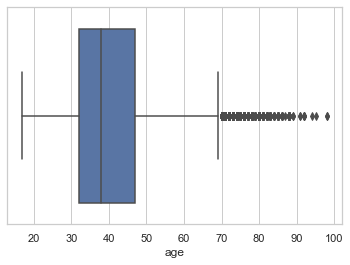

In [21]:
sns.boxplot(data['age'])
# sns.distplot(data['age'])

In [25]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

for this project, the desired target or the predict variable is :
- y --> did the client subsribe a term deposit ( 1 means "YES", 0 means "NO" )

the education column of dataset has many categories, hence we need to redute the category for better modeling

In [26]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

### group the Basic into ONe

In [33]:
data['education']= data['education'].apply(get_the_basic_into_one)

In [30]:
def get_the_basic_into_one(val):
    if 'basic' in val:
        data= 'Basic'
    else:
        data= val
    return data

# --Exploration Data Analysis--

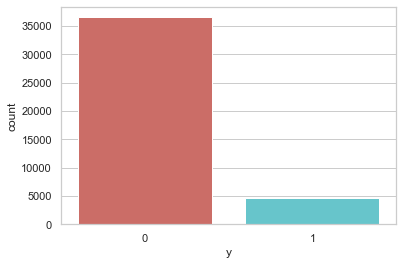

In [44]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()

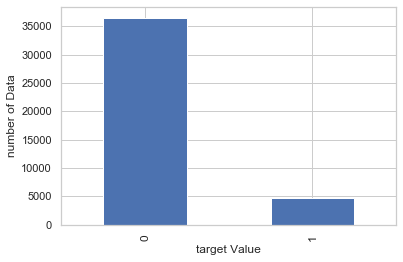

In [42]:
data['y'].value_counts().plot(kind='bar')
plt.xlabel('target Value',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('number of Data',fontsize= 12)
plt.show()

### calculate the subscription and non-subs

In [53]:
no= data['y'].value_counts()[0]/(data['y'].value_counts()[0]+data['y'].value_counts()[1])
yes= 1-no
print('count of the non subscription = '+ str(no))
print('count of the subscription = '+ str(yes))


count of the non subscription = 0.8873458288821987
count of the subscription = 0.1126541711178013



### problem, we dealing with Imbalanced Datasets 

the imbalaced dataset can lead to a huge problems. will affect the precision of the predictive modeling result in so many ways. 

### continue EDA. .  .  

In [60]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


#### observations :
- average of age customer who get the deposits are slightly higher than the ones who dont
- the pdays (since the customer was contacted) was waay higher for the ones who dont deposite. the lower pdays, the better chance for the deposite saving for sales division 

In [61]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [63]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [65]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## Visualization

# ----   Pre-Processing    ----

### Create DUmmy Variables


In [71]:
cat_vars= ['job','marital','education','default','housing','loan','contact','month',
          'day_of_week','poutcome']
for var in cat_vars:
    cat_list= 'var'+'_'+var
    cat_list= pd.get_dummies(data[var],prefix=var)
    data1= data.join(cat_list)
    data=data1

In [85]:
data_vars= data.columns.values.tolist()
to_keep= [i for i in data_vars if i not in cat_vars]

the data will look like this

In [88]:
data_final= data[to_keep]
print(data_final.shape)
data_final.head()

(41188, 62)


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


### now we build model without normalizing the Numerical Data


## SMOTE

synthetic minority oversampling Technique

work by creating synthetic samples from the minor class instead of Coping

In [89]:
from imblearn.over_sampling import SMOTE

In [101]:
X= data_final.drop(columns='y')
y= data_final['y']

#### building SMOTE model

In [102]:
os= SMOTE(random_state=0)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [104]:
columns= X_train.columns
os_data_X,os_data_y= os.fit_sample(X_train,y_train)

In [110]:
os_data_X= pd.DataFrame(os_data_X,columns=columns)


In [114]:
os_data_y= pd.DataFrame(os_data_y)

## Recursive Feature Elimination 

is based on the idea to repeatedly construct model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. the goal is to select feature by recursively considering smaller and smaller datasets

In [115]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression

drop the 'y' columns

In [119]:
data_final_vars =  data_final.columns.values.tolist()
tarr= ['y']
Xcol = [i for i in data_final_vars if i not in tarr]

In [124]:
logreg = LogisticRegression()
rfe= RFE(logreg,20)
rfe= rfe.fit(os_data_X,os_data_y.values.ravel())

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Inc

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

In [130]:
os_data_X.columns


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day

In [149]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False])

In [144]:
rfe.ranking_

array([38, 39, 32, 40, 31, 37, 30, 34, 21, 36, 15,  8,  9, 10, 14, 19, 13,
       12, 18, 11, 17, 16,  1,  1,  1,  1,  1,  1, 41,  1,  1,  1,  3,  2,
       42,  1,  1,  1,  1,  1,  1,  5,  4, 22, 24, 25, 27, 26, 35, 20, 23,
       29, 28,  1,  1,  1,  1,  1,  7,  6, 33])

In [137]:
list((os_data_X.columns)).index('marital_unknown')


25

### selected features based on the result of RFE

In [142]:
cols= ['euribor3m','job_blue-collar','job_housemaid','marital_unknown','education_illiterate','default_no','default_unknown',
      'contact_cellular','contact_telephone','month_apr','month_aug','month_dec','month_jul','month_jun','month_mar',
      'month_may','month_nov','month_oct','poutcome_failure','poutcome_success']
X= os_data_X[cols]
y= os_data_y['y']

### checking how the feature selected using RFE

In [152]:
value_nya_falstrue= []
value_nya= []
for a in cols:
    
    indexx= list((os_data_X.columns)).index(a)
    value=     list((rfe.ranking_))[indexx]
    value_tru=     list((rfe.support_))[indexx]
    value_nya.append(value)
    value_nya_falstrue.append(value_tru)

### implementing the Model

this model will check the p-value. we will remove the p-value more than 0.05

In [155]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result= logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455646
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.343     
Dependent Variable:   y                 AIC:               46637.9802
Date:                 2021-01-26 10:54  BIC:               46814.8243
No. Observations:     51134             Log-Likelihood:    -23299.   
Df Model:             19                LL-Null:           -35443.   
Df Residuals:         51114             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1613   0.0082  19.7907 0.0000  0.1454  0.1773
job_blue-collar 

### but for now we will proceed the whole  columns

# ----    Model  creation   ----

### 1) Machine learning Building

In [163]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

splitting the data

#### and the Model Building

In [158]:
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size= 0.3, random_state= 0)
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### the other model

In [161]:
DT_modell= DecisionTreeClassifier()
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
DT_modell.fit(X_train,y_train)

DecisionTreeClassifier()

## 2) predicting the test set result and calculating the Accuracy 

In [170]:
y_pred= logreg.predict(X_test)
print( 'accuracy using the Score method : ',logreg.score(X_test,y_test))
print('accuracy using the Accuracy score : ',accuracy_score(y_test,y_pred))

accuracy using the Score method :  0.8709340981683071
accuracy using the Accuracy score :  0.8709340981683071


## accuracy of other model

In [172]:
y_pred_DT= DT_modell.predict(X_test)
y_pred_RF= RF_model.predict(X_test)

print('accuracy of DT is : ',accuracy_score(y_test,y_pred_DT))
print('accuracy of RF is : ',accuracy_score(y_test,y_pred_RF))

accuracy of DT is :  0.9217130565152206
accuracy of RF is :  0.92210416530865


##  3. Evaluation

### a) Confusion Matrix

In [180]:
from sklearn.metrics import confusion_matrix
# sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion_matrix(y_test,y_pred)

array([[7021,  645],
       [1335, 6340]], dtype=int64)

#### confusion Matrix for other Model

In [186]:
print(confusion_matrix(y_test,y_pred_RF), 'for the Random Forest Model')
print('  ')
print(' ')
print(confusion_matrix(y_test,y_pred_DT), 'for the Decision Tree Model')

[[7344  322]
 [ 873 6802]] for the Random Forest Model
  
 
[[7391  275]
 [ 926 6749]] for the Decision Tree Model


#### confusion Matrix for the Random Forest

     Confusion Matrix for THe Random Forest


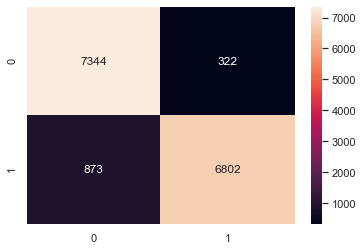

In [218]:
print('     Confusion Matrix for THe Random Forest')
sns.heatmap(confusion_matrix(y_test,y_pred_RF),annot=True,fmt='d')

#### Confusion Matrix FOr the Decision Tree

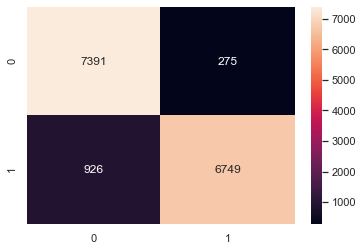

In [219]:
sns.heatmap(confusion_matrix(y_test,y_pred_DT),annot=True,fmt='d')

### B) Recall,Precision

In [187]:
from sklearn.metrics import classification_report

In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7666
           1       0.91      0.83      0.86      7675

    accuracy                           0.87     15341
   macro avg       0.87      0.87      0.87     15341
weighted avg       0.87      0.87      0.87     15341



####  classification Report for other Model

#### classification Report, F1,recall and precision for Random Forest Model

In [191]:

print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7666
           1       0.95      0.89      0.92      7675

    accuracy                           0.92     15341
   macro avg       0.92      0.92      0.92     15341
weighted avg       0.92      0.92      0.92     15341



### classification report for the Decision Tree Model

In [192]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7666
           1       0.96      0.88      0.92      7675

    accuracy                           0.92     15341
   macro avg       0.92      0.92      0.92     15341
weighted avg       0.92      0.92      0.92     15341



### c) ROC CURVE ANALYSIS

#### for the Logistic Regression Model

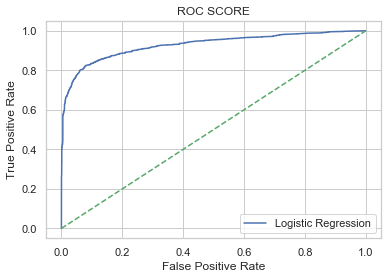

In [208]:
from sklearn.metrics import roc_auc_score ,roc_curve
logreg_auc_roc= roc_auc_score(y_test,y_pred)
fpr1, tpr1,thresholds1= roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1,tpr1, label= 'Logistic Regression'%logreg_auc_roc)
plt.plot([0,1],[0,1],'g--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SCORE')
plt.legend(loc='best')

### Combining All model into One Picture

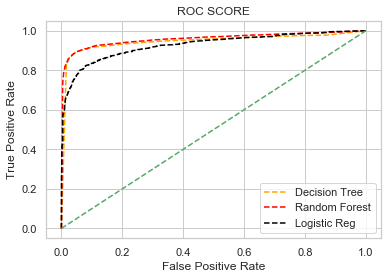

In [215]:
fpr2,tpr2,thres2= roc_curve(y_test,DT_modell.predict_proba(X_test)[:,1])
fpr3,tpr3,thres3= roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
fpr4,tpr4,thres4= roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
random_probs= [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr2,tpr2,linestyle= '--', color= 'orange', label= 'Decision Tree')
plt.plot(fpr3,tpr3,linestyle= '--', color= 'red', label= 'Random Forest')
plt.plot(fpr4,tpr4,linestyle= '--', color= 'black', label= 'Logistic Reg')
# plt.legend(loc='best')
plt.plot([0,1],[0,1],'g--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SCORE')
plt.legend(loc='best')

## 4) Feature Importance Analysis

#### the Logistic regression model

#### Decision Tree and Random Forest feature importance

#### importance Random FOrest

In [231]:
pd.DataFrame({'feature': list(X_train.columns),
                   'importance': RF_model.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
0,euribor3m,0.435624
8,contact_telephone,0.097338
6,default_unknown,0.062754
15,month_may,0.056767
5,default_no,0.055628
7,contact_cellular,0.049628
1,job_blue-collar,0.042725
10,month_aug,0.037340
12,month_jul,0.034294
16,month_nov,0.030262


####  importance Decision Tree

In [230]:
pd.DataFrame({'feature': list(X_train.columns),
                   'importance': DT_modell.feature_importances_}).\
                    sort_values('importance', ascending = False)

,feature,importance
0,euribor3m,0.551973
7,contact_cellular,0.097919
8,contact_telephone,0.082768
5,default_no,0.078128
15,month_may,0.049136
9,month_apr,0.030625
18,poutcome_failure,0.020189
6,default_unknown,0.016475
12,month_jul,0.015513
1,job_blue-collar,0.013709


In [232]:
X_train

,euribor3m,job_blue-collar,job_housemaid,marital_unknown,education_illiterate,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success
643,1.334000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
16011,4.963000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
16379,4.021000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
42669,4.963000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
22348,4.076000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.908000,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
45891,1.359089,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
42613,0.751425,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
43567,4.963525,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


### Probability for deposits

In [252]:
# for_proba= X_train
# for_proba['y']= y_train

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [270]:
for_proba['probability_y']=list((DT_modell.predict_proba(X_train)))

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [272]:
final_result_modeling= for_proba

#### using Testing Data

### comparing the Y_true,Y_pred, probability

In [282]:
# finalresultmodeling = X_test[X_test.columns]

In [290]:
finalresultmodeling['y_true']= y_test

In [291]:
finalresultmodeling['y_predicted_logreg']= y_pred
finalresultmodeling['y_predicted_DT']= y_pred_DT
finalresultmodeling['y_predicted_RF']= y_pred_RF

In [296]:
finalresultmodeling

,euribor3m,job_blue-collar,job_housemaid,marital_unknown,education_illiterate,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success,y_true
29155,4.112193,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38810,0.730354,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9276,1.266000,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11274,4.961000,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
35663,0.725466,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39885,0.926878,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
14000,4.962000,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
34607,4.942704,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46645,1.367571,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
